In [118]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle
import scipy as spicy
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
import scipy.io as sio

In [165]:
n6_1 = CortProcessor('/home/diya/Documents/MATLAB/Intracortical/N9_171204_No Obstacles_s.mat')
n6_2 = CortProcessor('/home/diya/Documents/MATLAB/Intracortical/N9_171121_No Obstacles_s.mat')

this is filipe data i belive
this is filipe data i belive


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
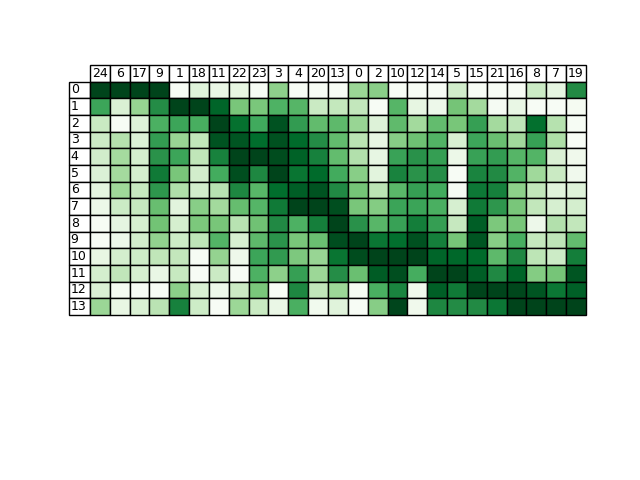

In [191]:
n6_2.divide_into_gaits()
sorty = n6_2.neuron_tuning()
plot_raster(sorty)

In [166]:
sess = CCAProcessor(n6_1, n6_2)

should be good to align


In [167]:
sess.get_better_decoder()

cp1 is better


In [168]:
num_components = sess.PCA_to_same_dimensions()

# how does each decoder work individually before PCA

In [169]:
print(np.average(sess.cp1.vaf,1))

[0.52657319 0.69859161 0.30759775 0.70132596 0.52755857]


In [170]:
print(np.average(sess.cp2.vaf,1))

[ 0.54642136  0.61145908 -0.08213925  0.68434821  0.10623962]


# how does each decoder work after PCA

In [171]:
num_components, cp1_pca, cp2_pca = sess.PCA_to_same_dimensions()

In [172]:
cp1_pca_h, vaf1, nada, nada = n6_1.decode_angles(X=[sess.cp1.pca_x], Y=[sess.cp1.proc_y])
cp2_pca_h, vaf2, nada, nada = n6_2.decode_angles(X=[sess.cp2.pca_x], Y=[sess.cp2.proc_y])

In [173]:
np.average(vaf1, 1)

array([0.51530339, 0.69976581, 0.30879342, 0.69564856, 0.52630088])

In [174]:
np.average(vaf2, 1)

array([ 0.54570974,  0.61484368, -0.04495156,  0.68478384,  0.11144547])

# x2 data on x1 decoder

In [175]:
format_x1, format_y1 = format_data(sess.cp1.pca_x, sess.cp1.proc_y)
format_x2, format_y2 = format_data(sess.cp2.pca_x, sess.cp2.proc_y)

In [176]:
y1_hat = test_wiener_filter(format_x1, cp1_pca_h)
vaf(format_y1[:,1], y1_hat[:,1])

0.6949304118374604

In [177]:
y2_hat = test_wiener_filter(format_x2, cp1_pca_h)
vaf(format_y2[:,1], y2_hat[:,1])

0.14669564607376973

In [178]:
sess.num_components

22

# x2 cca data on x1 decoder

In [179]:
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [180]:
cca_x1x2 = CCA(n_components=sess.num_components, scale=False)
x1_cca, x2_cca=cca_x1x2.fit_transform(sess.cp1.pca_x, sess.cp2.pca_x)

In [181]:
x2_hat = cca_x1x2.inverse_transform(x2_cca) 

In [182]:
format_x2_hat, format_y2 = format_data(x2_hat, sess.cp2.proc_y)

In [183]:
format_x2_hat.shape, format_y2.shape

((6276, 220), (6276, 5))

In [184]:
y2_predic = test_wiener_filter(format_x2_hat, cp1_pca_h)
vaf(format_y2[:,1], y2_predic[:,1])

0.4790027601035499

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
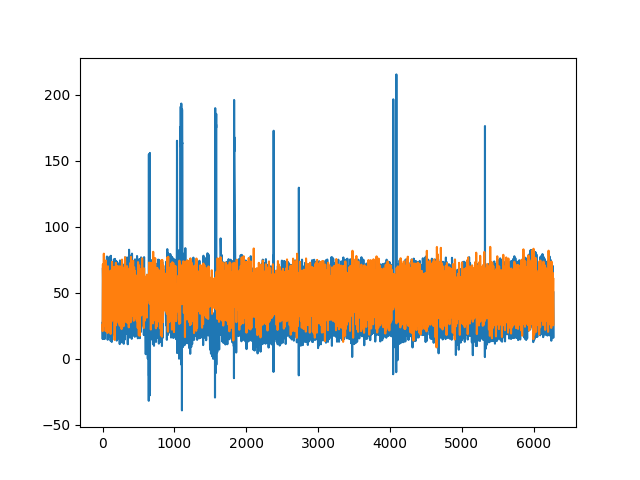

In [185]:
fig, ax = plt.subplots()
ax.plot(format_y2[:,1])
ax.plot(y2_predic[:,1])


In [187]:
format_x2, format_y2 = format_data(sess.cp2.pca_x, sess.cp2.proc_y)
y2_old_predic = test_wiener_filter(format_x2, cp1_pca_h)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
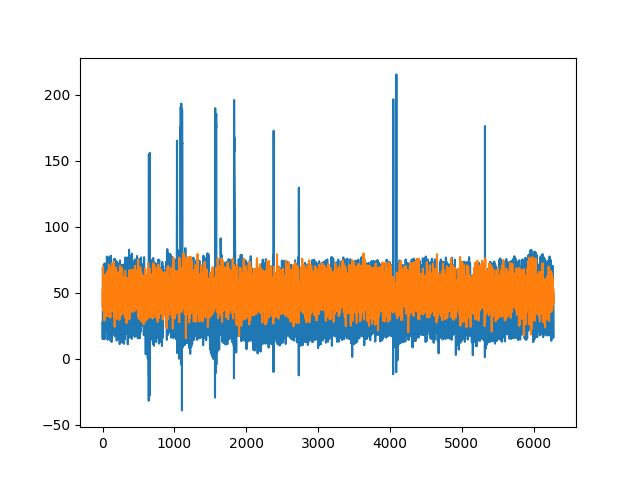

In [188]:
fig, ax = plt.subplots()
ax.plot(format_y2[:,1])
ax.plot(y2_old_predic[:,1])